# Stroop Test
- Project of `P1: Test a Perceptual Phenomenon`
- Neo Xing, 2016/10
- Reference
    - [Wikipedia: Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect)
    - [Scipy t test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)
    - [Stroop: STUDIES OF INTERFERENCE IN SERIAL VERBAL REACTIONS](http://psychclassics.yorku.ca/Stroop/)

## Data overview

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [3]:
data_file = 'stroopdata.csv'
data = pd.read_csv(data_file)
diff_data = pd.DataFrame(data['Congruent'] - data['Incongruent'])
display(data.head())
display(data.describe())

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


## Questions

### 1 What is our independent variable? What is our dependent variable?

The independent variable is **whether the word name and font color are same of different**, the dependent variable is **testing time for congurent test and incongurent test**.

### 2 What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

***Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.***

1. **Set of hypotheses**
    - The null hypothesis $H_0$ is the mean population react time of congruent group is not signicicantly smaller than the incongurent group, namely $u_1 >= u_2$.
    - The alternate hypothesis $H_1$ is the mean population react time of congruent group is signicicantly smaller than the incongurent group, namely $u_1 < u_2$.
    - $u_1$ is the mean population react time of congruent group, $u_2$ is the mean population react time of incongruent group.

2. **Statistical test**
    - The t test for dependent means is choosen, it's an one-tailed test in negative zone.
    - The z test is not suitable as the mean value and standard deviation of population are unknown for small sample size.
    
3. **Statistical assumptions**
    - Each observation of the dependent variable is independent of the other observations of the dependent variable 
    - Dependent variable has a normal distribution, with the same variance in each group
    - The dependent variable is continuous

### 3 Report some descriptive statistics regarding this dataset. 
***Include at least one measure of central tendency and at least one measure of variability.***

From following statistical descriptions, it seems that there is visible difference (mean value ~8, z value ~2) of two testing datas.

In [4]:
print("\nStatistics of data")
display(data.describe())
print("\nStatistics of difference of congurent and incongurent data")
display(diff_data.describe())


Statistics of data


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000



Statistics of difference of congurent and incongurent data


,0
count,24.000000
mean,-7.964792
std,4.864827
min,-21.919000
25%,-10.258500
50%,-7.666500
75%,-3.645500
max,-1.950000


### 4 Provide one or two visualizations that show the distribution of the sample data. 
***Write one or two sentences noting what you observe about the plot or plots.***

- From the bar chart of test time we can see that for each participant the congurent test takes less time than incongurent test.
- From the bar chart or histogram, we can see that the overall time of congurent tests is less than incongurent tests.

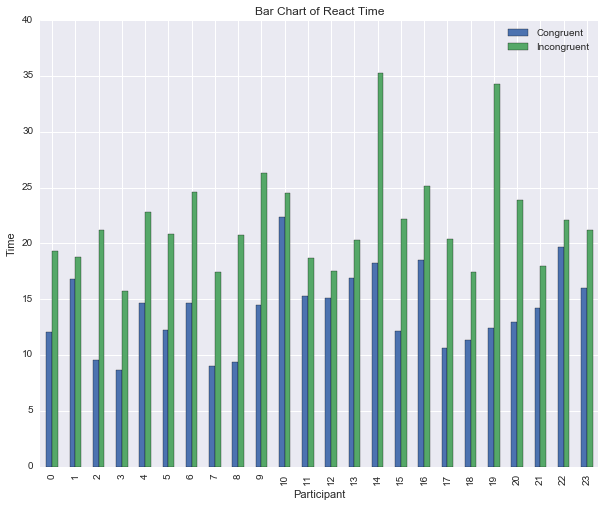

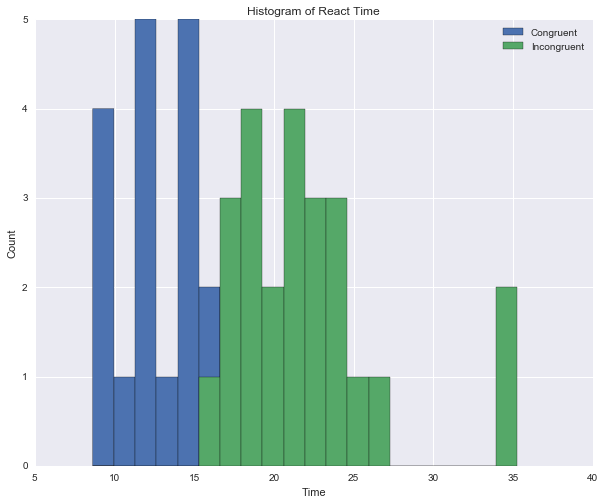

In [8]:
fig = data.plot.bar()
fig.set_title('Bar Chart of React Time')
fig.set_xlabel('Participant')
_ = fig.set_ylabel('Time')

fig = data.plot.hist(bins=20)
fig.set_title('Histogram of React Time')
fig.set_xlabel('Time')
_ = fig.set_ylabel('Count')

### 5 Perform the statistical test and report your results. 
***What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?***

- The choosen confidence level is 99% with $\alpha = 1\%$.
- The p-value ($4 \times 10^{-8}$) we get lies in the critical zone of left corner, which means the null hypothesis is rejected.
- The conclusion that congurent tests take less time than incongurent tests matches previous expectations.

In [152]:
# t-test for two groups of dependent data
ttest = stats.ttest_rel(data['Congruent'], data['Incongruent'])
print "p-value =", ttest.pvalue
print "t-value =", ttest.statistic

p-value = 4.10300058571e-08
t-value = -8.02070694411


### 6 Optional: What do you think is responsible for the effects observed? 
***Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!***

- The possible reason for the difference of data could be it takes more time for brain to interpret (whether by recognizing or expressing) color than language.
- The congurent test could be replaced by the **neutral test**, namely, all words are printed in black color. It just involoves the recognition of word sematic meaning, without any intervention of colors.